# Sediment budget over the river

In this notebook the sediment budget for in the river reach is calculated and plotted. First A single scenario is explained, following with the plots for all the scenarios.

## 1. Visualise the Delta

In [73]:
# import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import netCDF4 as nc
import dfm_tools as dfmt
from interactive import *

In [75]:
# Import no dredging data
trihC = "Mahakam_500/Dreding duration/mahakam_control_sim/trih-001.nc"
trimC = "Mahakam_500/Dreding duration/mahakam_control_sim/trim-001.nc"

# Import duration results
trih10 = "Mahakam_500/Dreding duration/10 jaar dredging/trih-001.nc"
trih20 = "Mahakam_500/Dreding duration/20 jaar dredge/trih-001.nc"
trih30 = "Mahakam_500/Dreding duration/30 jaar dredge/trih-001.nc"
trih40 = "Mahakam_500/Dreding duration/40 jaar dredge/trih-001.nc"
trih50 = "Mahakam_500/Dreding duration/50 jaar dredge/trih-001.nc"

# Import intensity results
trih0_5 = "Mahakam_500/Dredging_intensity/0.5x_Sed_10_years/trih-001.nc"
trih1_0 = "Mahakam_500/Dredging_intensity/1.0x_Sed_10_years/trih-001.nc"
trih2_0 = "Mahakam_500/Dredging_intensity/2.0x_Sed_10_years/trih-001.nc"
trih5_0 = "Mahakam_500/Dredging_intensity/5.0x_Sed_10_years/trih-001.nc"
trih10_0 = "Mahakam_500/Dredging_intensity/10.0x_Sed_10_years/trih-001.nc"

# Import Grouped results
trihG1 = "Mahakam_500/grouped_pits/10 jaar dredge grouped4/trih-001.nc"
trihG2 = "Mahakam_500/grouped_pits/10 jaar dredge grouped2/trih-001.nc"
trihG4 = trih10  # control, 4 means for locations

# Import Wider results
trihB1 = trih10  # control
trihB2 = "Mahakam_500/grouped_pits/10 jaar dredge 2 broad/trih-001.nc"
trihB3 = "Mahakam_500/grouped_pits/10 jaar dredge 3 broad/trih-001.nc"
trihB4 = "Mahakam_500/grouped_pits/10 jaar dredge 4 broad/trih-001.nc"

# Import Longer Results
trihL1 = trih10  # control
trihL2 = "Mahakam_500/grouped_pits/10 jaar dredge 2 long/trih-001.nc"
trihL3 = "Mahakam_500/grouped_pits/10 jaar dredge 3 long/trih-001.nc"
trihL4 = "Mahakam_500/grouped_pits/10 jaar dredge 4 long/trih-001.nc"

# Make a trih list:
trihlist = [trih10, trih20, trih30, trih40, trih50,
            trih0_5, trih1_0, trih2_0, trih5_0, trih10_0,
            trihG4, trihG2, trihG1,
            trihB1, trihB2, trihB3, trihB4,
            trihL1, trihL2, trihL3, trihL4]

trihIDs = ["trih10", "trih20", "trih30", "trih40", "trih50",
           "trih0_5", "trih1_0", "trih2_0", "trih5_0", "trih10_0",
           "trihG4", "trihG2", "trihG1",
           "trihB1", "trihB2", "trihB3", "trihB4",
           "trihL1", "trihL2", "trihL3", "trihL4"]

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.


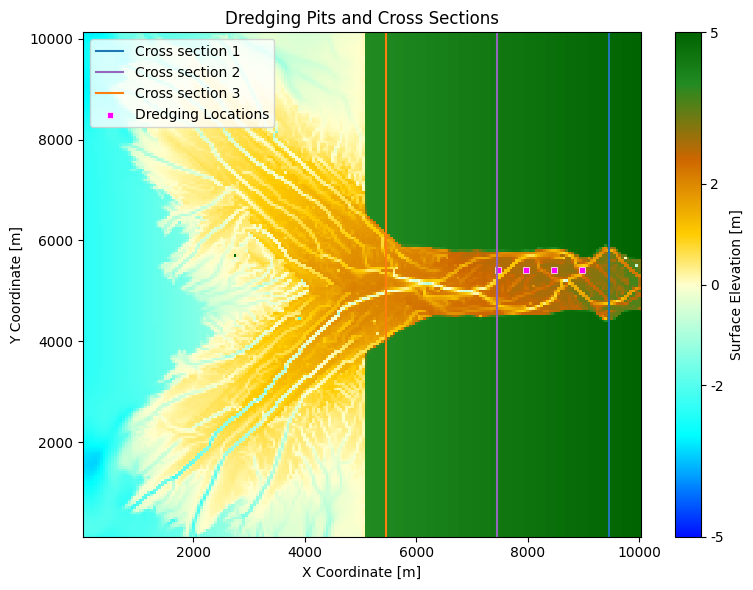

In [92]:
# Parameters
time_index = -1
vmin, vmax, vcenter = -5, 5, 0
cross = [ 0, 4, 7 ]   # Cross-section indices

# Load and process main dataset
dataset = xr.open_dataset(trimC)   # just for visualisation 
depth_at_t = -dataset["DPS"][time_index, 1:-1, 1:-1].values
xc = dataset["XCOR"].values[1:-1, 1:-1]
yc = dataset["YCOR"].values[1:-1, 1:-1]
time_label = dataset["time"].values[time_index]


# Custom colormap and normalization
colors = [
    (0.00, "#000fff"),   # deep water
    (0.20, "#00ffff"),  # water edge
    (0.50, "#ffffcc"),  # land edge
    (0.60, "#ffcc00"),   # orange
    (0.75, "#cc6600"),   # brown
    (0.90, "#228B22"),   # green
    (1.00, "#006400"),   # dark green
]
terrain_like = LinearSegmentedColormap.from_list("custom_terrain", colors)
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

# Load cross-section data
ds_his = xr.open_mfdataset(trih10, preprocess=dfmt.preprocess_hisnc, decode_timedelta=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(xc, yc, depth_at_t, shading='auto', cmap=terrain_like, norm=norm)

ax.axvline(ds_his.XYTRA[0].values[0], color='C0', linestyle='-', label='Cross section 1')
ax.axvline(ds_his.XYTRA[7].values[0], color='C4', linestyle='-', label='Cross section 2')
ax.axvline(ds_his.XYTRA[4].values[0], color='C1', linestyle='-', label='Cross section 3')
# ax.axvline(ds_his.XYTRA[7].values[0], color='C4', linestyle='-', label='Cross section 2')


pit_x = np.array([7450.0, 7950.0, 8450.0, 8950.0]) + 25  # mean of each X-range
pit_y = np.array([5452.0898, 5451.0, 5451.0, 5451.0]) - 30  # approximate Y center


ax.scatter(pit_x, pit_y, 
           marker='s', 
           s=25, 
           color='magenta', 
           edgecolor='white', 
           linewidth=0.5, 
           label='Dredging Locations')

# Labels and colorbar
ax.set_title(f'Dredging Pits and Cross Sections')
ax.set_xlabel('X Coordinate [m]')
ax.set_ylabel('Y Coordinate [m]')
cb = fig.colorbar(c, ax=ax, label='Surface Elevation [m]')

cb.set_ticks([vmin, -2, 0, 2, vmax])
cb.ax.set_yticklabels([str(vmin), '-2', '0', '2', str(vmax)])

ax.legend()
plt.tight_layout()

# plt.savefig('C:/Users/camup/Documents/aaMEE/Master thesis/figures/Cross_section_fromAbove.png')
plt.show()
dataset.close()

## 2. Visualise Sediment Flux

In [79]:
# plot Cross-sections for before and after sediment concentration in the river.
ds_his = xr.open_mfdataset(trihC, preprocess=dfmt.preprocess_hisnc, decode_timedelta=False)
cross = [ 0, 7, 4 ]   # Cross-section indices, left boundary, middle, right boundary
sed_rates_control = []
porosity = 0.4
morf_time = ds_his.MORFT.values / 365 - 499 

for left_cross in cross:
    bedload = ds_his.SBTR[:, 0, left_cross]   *-1                               # m3/s : but delt= 10 min.  bedload through section; units are in m3/s but when resampling, you need the delt
    bedload_vol = bedload / ( 1 - porosity )                                    # include porosity  
    sed_rates_control.append(bedload_vol)

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.


In [81]:
trihfile = trih10

ds_his = xr.open_mfdataset(trihfile, preprocess=dfmt.preprocess_hisnc, decode_timedelta=False)
porosity = 0.4
morf_time = ds_his.MORFT.values / 365 - 499                                  # morf time from days to years and shift so year 500 == year one
    
sed_rates = []
for left_cross in cross:
    bedload = ds_his.SBTR[:, 0, left_cross]   *-1                               # m3/s : but delt= 10 min.  bedload through section; units are in m3/s but when resampling, you need the delt
    bedload_vol = bedload / ( 1 - porosity )                                    # include porosity  
    sed_rates.append(bedload_vol)

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.


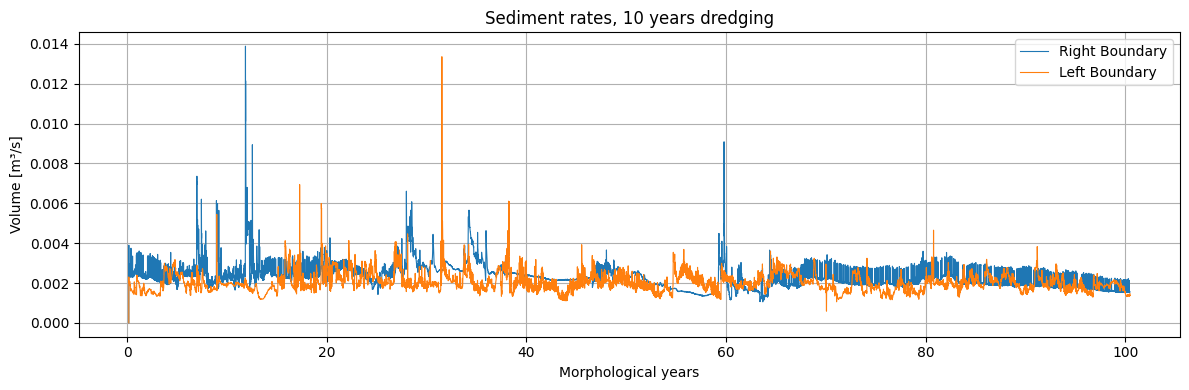

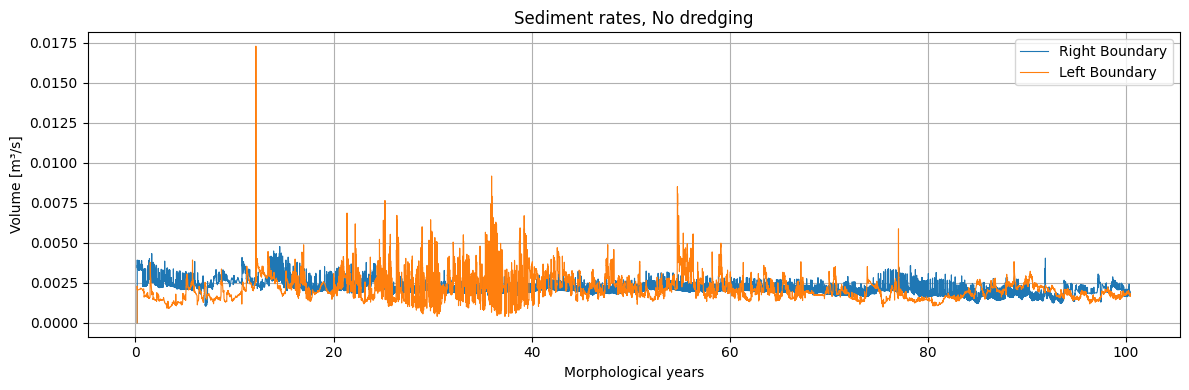

In [83]:
# plot bedload rates
plt.figure(figsize=(12, 4))

plt.plot(morf_time, sed_rates[0], linestyle= "-", label='Right Boundary', alpha = 1, linewidth = 0.8)
plt.plot(morf_time, sed_rates[2], linestyle= "-", label='Left Boundary', alpha = 1, linewidth = 0.8)

plt.title("Sediment rates, 10 years dredging") 
plt.xlabel("Morphological years")
plt.ylabel("Volume [m³/s]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# plot bedload rates
plt.figure(figsize=(12, 4))

plt.plot(morf_time, sed_rates_control[0], linestyle= "-", label='Right Boundary', alpha = 1, linewidth = 0.8)
plt.plot(morf_time, sed_rates_control[2], linestyle= "-", label='Left Boundary', alpha = 1, linewidth = 0.8)

plt.title("Sediment rates, No dredging") 
plt.xlabel("Morphological years")
plt.ylabel("Volume [m³/s]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

This does not give a clear insight into what is happening, so the cumuative sediment budget is plotted.

## 3. Cumulative Sediment Storage Flux

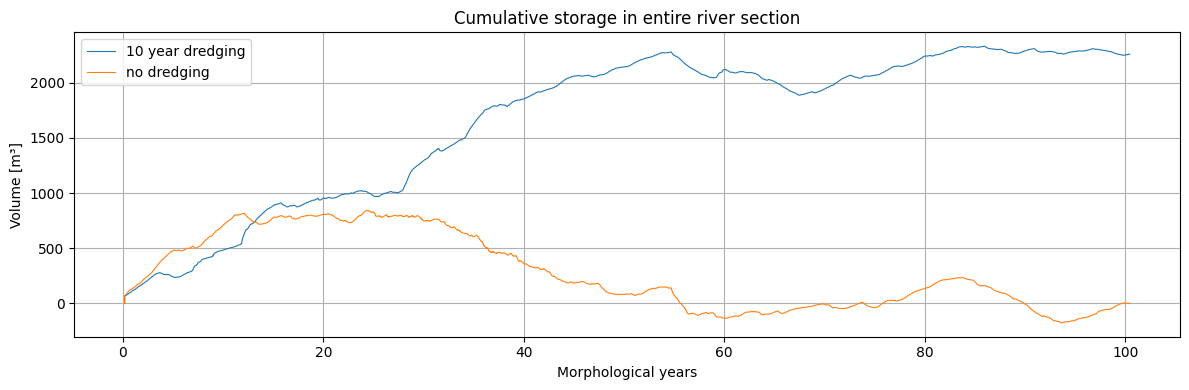

In [86]:
inflow_rates = sed_rates[0]   # m3/s
outflow_rates = sed_rates[2]  # m3/s

time_step_seconds = 10 * 60  # 600 seconds

# Calculate net flux at each time step
net_flux = inflow_rates - outflow_rates  # m3/s

# Calculate storage volume change per time step (m3)
volume_change = net_flux * time_step_seconds

# Cumulative net storage over time (m3)
cumulative_dredge = np.cumsum(volume_change).values

# Same for control scenario:
inflow_rates = sed_rates_control[0]   # m3/s
outflow_rates = sed_rates_control[2]  # m3/s
time_step_seconds = 10 * 60  # 600 seconds
net_flux = inflow_rates - outflow_rates  # m3/s
volume_change = net_flux * time_step_seconds

cumulative_control = np.cumsum(volume_change).values

# plot both
plt.figure(figsize=(12, 4))

plt.plot(morf_time, cumulative_dredge, linestyle= "-", color= 'C0', label='10 year dredging', alpha = 1, linewidth = 0.8)
plt.plot(morf_time, cumulative_control, linestyle= "-", color= 'C1', label='no dredging', alpha = 1, linewidth = 0.8)

plt.title(f"Cumulative storage in entire river section") 
plt.xlabel("Morphological years")
plt.ylabel("Volume [m³]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Here the difference betweeen the two situations is clearly  visible and somehting has changed by the fact that dredgin has occured. This plot is now made for all the scenarios.

# Make all scenarios

## 1. Retrieve all data

In [101]:
Sed_Vol_series = [] 
for trihfile in trihlist:
    ds_his = xr.open_mfdataset(trihfile, preprocess=dfmt.preprocess_hisnc, decode_timedelta=False)
    sed_rates = []
    for section in cross:
        bedload = ds_his.SBTR[:, 0, section]   *-1                               # m3/s : but delt= 10 min.  bedload through section; units are in m3/s but when resampling, you need the delt
        bedload_vol = bedload / ( 1 - porosity )                                    # include porosity  
        sed_rates.append(bedload_vol)
    Sed_Vol_series.append(sed_rates)

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
Your model was run with a D-FlowFM version f

In [105]:
sed_array = np.array(Sed_Vol_series)  # (21, 3, 13249)
sed_array = sed_array.transpose(2, 0, 1)  # → (13249, 21, 3)
sed_array = sed_array.reshape(13249, 21 * 3)  # → (13249, 63)

# Create MultiIndex for columns
arrays = [
    [tid for tid in trihIDs for _ in range(3)],
    [f"{i}" for _ in trihIDs for i in ['right', 'middle', 'left']]]
column_index = pd.MultiIndex.from_arrays(arrays, names=["trih", "timestep"])


df = pd.DataFrame(sed_array, columns=column_index)
# df.to_csv("data\sediment_volumes.csv", index=False)

trihC = "Mahakam_500/Dreding duration/mahakam_control_sim/trih-001.nc"
ds_his = xr.open_mfdataset(trihC, preprocess=dfmt.preprocess_hisnc, decode_timedelta=False)
sed_rates = []
for section in crosssections:
    bedload = ds_his.SBTR[:, 0, section]   *-1                               # m3/s : but delt= 10 min.  bedload through section; units are in m3/s but when resampling, you need the delt
    bedload_vol = bedload / ( 1 - porosity )                                    # include porosity  
    sed_rates.append(bedload_vol.values)
df_control = pd.DataFrame(sed_rates).T
df_control.columns = ['right', 'middle', 'left']
# df_control.to_csv("data\Sedrates_control.csv", index_label="Timestep")


Now all the sediment rates are in a csv

## 2. Visualise the data

For the entire river we plot the cumulative sediment budget together with the control scenario.

In [119]:
# Load the CSV into a DataFrame
df_SV_whole = pd.read_csv("data\sediment_volumes.csv", header=[0, 1])
df_SV_control = pd.read_csv("data\Sedrates_control.csv", index_col='Timestep')


df_SV = df_SV_whole.iloc[145:].reset_index() #  Dredgin only starts after 1440 hours aka time step after t = 144
df_SV_control = df_SV_control.iloc[145:].reset_index()

In [140]:
# Storage for entire river, control
inflow_riv = df_SV_control['right']         # m³/s
outflow_riv = df_SV_control['left']         # m³/s

net_flux_riv = inflow_riv - outflow_riv          # m³/s; Calculate net flux at each time step
volume_change_riv = net_flux_riv * time_step_seconds # Calculate storage volume change per time step (m³)
cumulative_dredge_control = np.cumsum(volume_change_riv).values  # Cumulative net storage over time (m³)


In [124]:
trih = 'C:/Users/camup/Documents/Delft3D/Mahakam/Mahakam_500/Dreding duration/10 jaar dredging/trih-001.nc'
ds_his = xr.open_mfdataset(trih, preprocess=dfmt.preprocess_hisnc, decode_timedelta=False)
morf_time_tot = ds_his.MORFT.values / 365 - 499  
morf_time = morf_time_tot[145:]  #  Dredgin only starts after 1440 hours aka time step after t = 144

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.03.00.62434 from Oct 24 2018), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.


For all trihs, the sediment budget is added to a database to visualise:

In [163]:
# List of 'trih' keys you want to plot
trihIDs = ["trih10", "trih20", "trih30", "trih40", "trih50",
           "trih0_5", "trih1_0", "trih2_0", "trih5_0", "trih10_0",
           "trihG4", "trihG2", "trihG1",
           "trihB1", "trihB2", "trihB3", "trihB4",
           "trihL1", "trihL2", "trihL3", "trihL4"]

# Common parameters
time_step_seconds = 10 * 60  # 10 minutes in seconds

cum_dredge = [] 

for key in trihIDs:
    # Get inflow and outflow
    inflow_riv = df_SV[key]['right']      # m³/s
    outflow_riv = df_SV[key]['left']      # m³/s

    # Compute net flux and storage
    net_flux = inflow_riv - outflow_riv
    volume_change = net_flux * time_step_seconds
    cumulative_dredge = np.cumsum(volume_change).values
    cum_dredge.append(cumulative_dredge)

df_SB = pd.DataFrame(cum_dredge).T
df_SB.columns = trihIDs
df_SB['Control'] = cumulative_dredge_control
df_SB.index = morf_time
df_SB


,trih10,trih20,trih30,trih40,trih50,trih0_5,trih1_0,trih2_0,trih5_0,trih10_0,...,trihG1,trihB1,trihB2,trihB3,trihB4,trihL1,trihL2,trihL3,trihL4,Control
0.733638,0.522929,0.522929,0.522929,0.522929,0.522929,0.563329,0.522929,0.563547,0.563700,0.563846,...,0.563332,0.522929,0.522919,0.563325,0.563320,0.522929,0.563288,0.563300,0.563306,0.152381
0.741248,0.993966,0.993966,0.993966,0.993966,0.993966,1.033962,0.993966,1.074613,1.074629,1.037379,...,1.034303,0.993966,0.993936,1.033934,1.033931,0.993966,1.074274,1.074333,1.066532,0.320410
0.748858,1.495070,1.495070,1.495070,1.495070,1.495070,1.527854,1.495070,1.569418,1.537447,1.534190,...,1.574462,1.495070,1.488037,1.527971,1.528073,1.495070,1.537297,1.655282,1.647670,0.484354
0.756469,2.035462,2.035462,2.035462,2.035462,2.035462,2.022007,2.035462,2.064817,1.993107,2.031880,...,2.076770,2.035462,2.027992,1.982029,2.022482,2.035462,1.992147,2.110674,2.187213,0.658434
0.764079,2.524225,2.524225,2.524225,2.524225,2.524225,2.478331,2.524225,2.640303,2.440248,2.480359,...,2.612221,2.524225,2.569116,2.471530,2.472360,2.524225,2.524888,2.680080,2.756840,0.827767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100.421613,1618.819283,199.970200,21.950333,977.269716,-281.967911,-255.643049,1618.819283,688.893040,682.316877,-924.970828,...,-240.724719,1618.819283,148.592415,382.449952,-930.473746,1618.819283,122.285519,1184.365958,418.836687,-124.739064
100.429224,1618.812382,200.238252,21.496407,977.442722,-281.085794,-255.108321,1618.812382,688.761593,681.932442,-924.746925,...,-241.031564,1618.812382,148.528083,382.291858,-930.455169,1618.812382,121.835286,1184.399295,418.446160,-124.718008
100.436834,1618.856650,200.493888,21.080192,977.612469,-280.273597,-254.588148,1618.856650,688.615673,681.926369,-924.406511,...,-241.306974,1618.856650,148.555879,382.138806,-930.246914,1618.856650,121.391811,1184.433792,418.025067,-124.673993
100.444444,1618.895795,200.767291,20.622328,977.632754,-279.514838,-254.059493,1618.895795,688.735324,681.959416,-924.082153,...,-241.570554,1618.895795,148.493314,381.991526,-930.048123,1618.895795,120.975090,1184.490424,417.988413,-124.610371


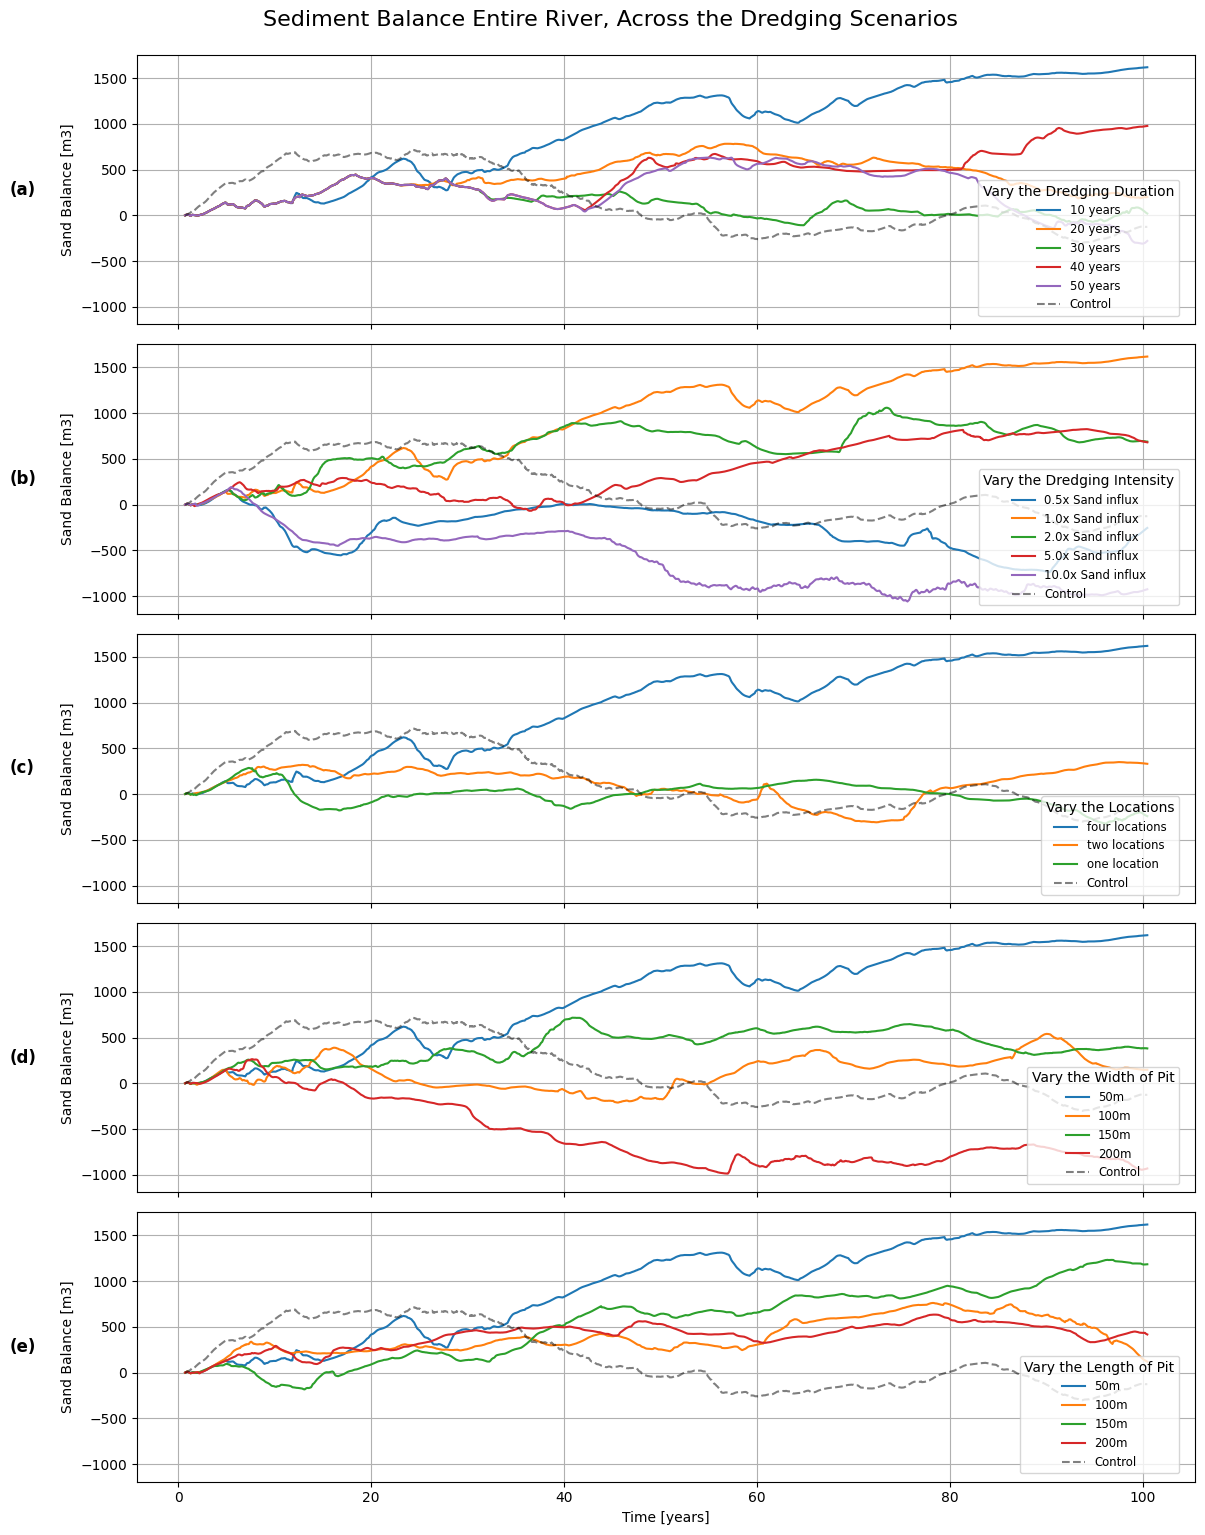

In [156]:
# Plot for each group
# Control trace
trimC = df_SB['Control']

groups = {
    'Dredging Duration': [col for col in df_SB.columns if "trih" in col and "_" not in col and not any(c in col for c in "GBL")],
    'Dredging Intensity': [col for col in df_SB.columns if "trih0" in col or "trih1_0" in col or "trih2_0" in col or "trih5_0" in col or "trih10_0" in col],
    'Locations': [col for col in df_SB.columns if "trihG" in col],
    'Width of Pit': [col for col in df_SB.columns if "trihB" in col],
    'Length of Pit': [col for col in df_SB.columns if "trihL" in col]
}


label_dict = {
    'trih10': '10 years', 'trih20': '20 years', 'trih30': '30 years', 'trih40': '40 years', 'trih50': '50 years',
    'trih0_5': '0.5x Sand influx', 'trih1_0': '1.0x Sand influx', 'trih2_0': '2.0x Sand influx', 
    'trih5_0': '5.0x Sand influx', 'trih10_0': '10.0x Sand influx',
    'trihG4': 'four locations', 'trihG2': 'two locations', 'trihG1': 'one location',
    'trihB1': '50m', 'trihB2': '100m', 'trihB3': '150m', 'trihB4': '200m',
    'trihL1': '50m', 'trihL2': '100m', 'trihL3': '150m', 'trihL4': '200m'
}


import string

fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharey=True, sharex=True)
subplot_labels = list(string.ascii_lowercase)

for i, (ax, (group_name, columns)) in enumerate(zip(axes, groups.items())):
    for col in columns:
        label = label_dict.get(col, col)
        ax.plot(df_SB.index, df_SB[col], label=label)
    ax.plot(df_SB.index, trimC, label='Control', color='black', linestyle='--', alpha=0.5)
    
    # Remove previous ylabel with labels; add text to left, centered vertically
    label_text = f"({subplot_labels[i]})"
    ax.text(-0.12, 0.5, label_text, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='left')
    
    ax.set_ylabel("Sand Balance [m3]")
    ax.grid()
    ax.legend(title=f'Vary the {group_name}', fontsize="small", loc='lower right', bbox_to_anchor=(0.99, 0.01))

axes[-1].set_xlabel("Time [years]")

plt.tight_layout()
plt.suptitle("Sediment Balance Entire River, Across the Dredging Scenarios", fontsize=16, y=1.02)
plt.savefig("C:/Users/camup/Documents/aaMEE/Master thesis/figures/SandBalance_overview_entireRIV.png", bbox_inches='tight', dpi=400)
plt.show()

## Section 1 and 2:
Also plot the sediment budgets for Section 1 and 2 of the river reach:

In [171]:
# control sections:
# Storage section 1
inflow_S1 = df_SV_control['right']          # m³/s
outflow_S1 = df_SV_control['middle']        # m³/s

time_step_seconds = 10 * 60 
net_flux_S1 = inflow_S1 - outflow_S1            # m³/s; Calculate net flux at each time step
volume_change_S1 = net_flux_S1 * time_step_seconds # Calculate storage volume change per time step (m³)
cumulative_dredge_S1 = np.cumsum(volume_change_S1).values  # Cumulative net storage over time (m³)

# Storage section 2
inflow_S2 = outflow_S1                       
outflow_S2 = df_SV_control['left']           

net_flux_S2 = inflow_S2 - outflow_S2  
volume_change_S2 = net_flux_S2 * time_step_seconds
cumulative_storage_S2 = np.cumsum(volume_change_S2).values

In [177]:
# now per section:
cum_dredge_s1 = []
cum_dredge_s2 = []

for key in trihIDs:
    # Section 1: middle inflow - left outflow
    inflow_right = df_SV[key]['right']                   # m³/s
    outflow_middle = df_SV[key]['middle']                # m³/s
    net_flux = inflow_right - outflow_middle
    volume_change_left_middle = net_flux * time_step_seconds
    cumulative_left_middle = np.cumsum(volume_change_left_middle).values
    cum_dredge_s1.append(cumulative_left_middle)
    
    # Section 2: right inflow - middle outflow
    inflow_middle = df_SV[key]['middle']    # m³/s
    outflow_middle = df_SV[key]['left'] # m³/s
    net_flux_middle_right = inflow_right - outflow_middle
    volume_change_middle_right = net_flux_middle_right * time_step_seconds
    cumulative_middle_right = np.cumsum(volume_change_middle_right).values
    cum_dredge_s2.append(cumulative_middle_right)

# Create DataFrames
df_s1 = pd.DataFrame(cum_dredge_s1).T
df_s1.columns = trihIDs
df_s1.index = morf_time  # assuming morf_time is your time index

df_s2 = pd.DataFrame(cum_dredge_s2).T
df_s2.columns = trihIDs
df_s2.index = morf_time

df_s1['Control'] = cumulative_dredge_S1
df_s2['Control'] = cumulative_storage_S2


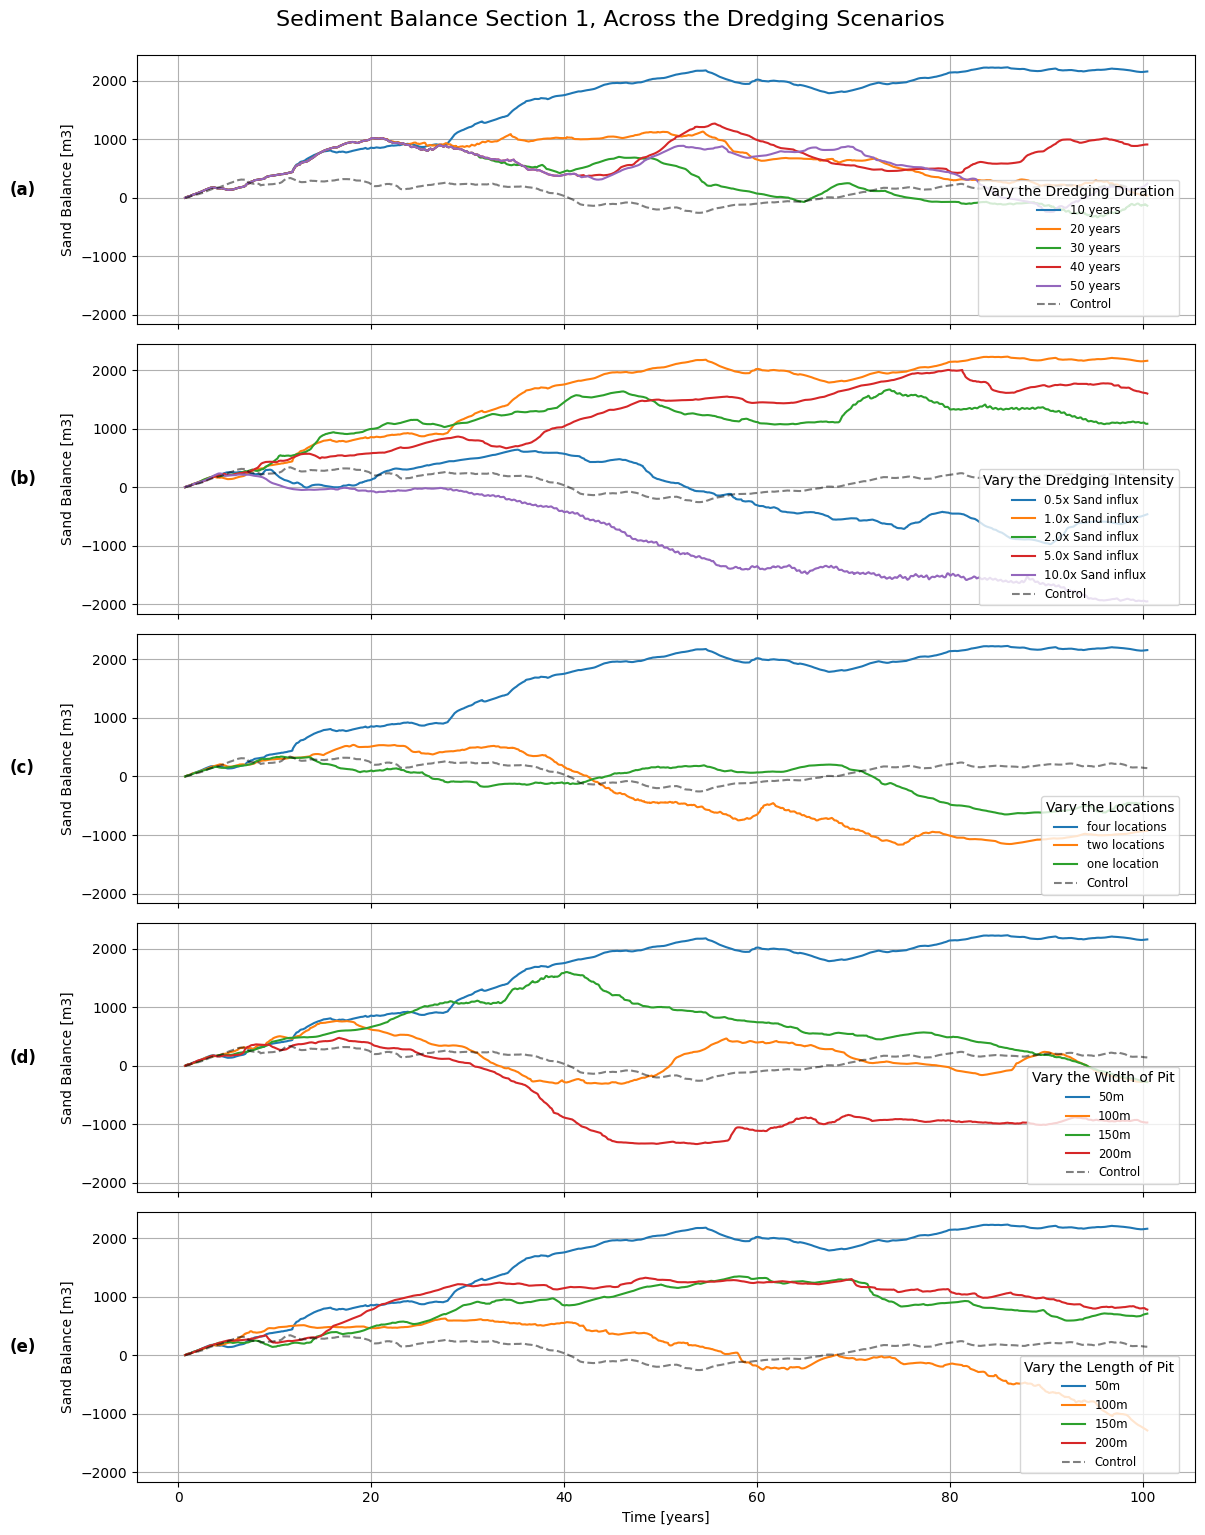

In [180]:
# Plot for each group
trimC = df_s1['Control']

groups = {
    'Dredging Duration': [col for col in df_s1.columns if "trih" in col and "_" not in col and not any(c in col for c in "GBL")],
    'Dredging Intensity': [col for col in df_s1.columns if "trih0" in col or "trih1_0" in col or "trih2_0" in col or "trih5_0" in col or "trih10_0" in col],
    'Locations': [col for col in df_s1.columns if "trihG" in col],
    'Width of Pit': [col for col in df_s1.columns if "trihB" in col],
    'Length of Pit': [col for col in df_s1.columns if "trihL" in col]
}


label_dict = {
    'trih10': '10 years', 'trih20': '20 years', 'trih30': '30 years', 'trih40': '40 years', 'trih50': '50 years',
    'trih0_5': '0.5x Sand influx', 'trih1_0': '1.0x Sand influx', 'trih2_0': '2.0x Sand influx', 
    'trih5_0': '5.0x Sand influx', 'trih10_0': '10.0x Sand influx',
    'trihG4': 'four locations', 'trihG2': 'two locations', 'trihG1': 'one location',
    'trihB1': '50m', 'trihB2': '100m', 'trihB3': '150m', 'trihB4': '200m',
    'trihL1': '50m', 'trihL2': '100m', 'trihL3': '150m', 'trihL4': '200m'
}


import string

fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharey=True, sharex=True)
subplot_labels = list(string.ascii_lowercase)

for i, (ax, (group_name, columns)) in enumerate(zip(axes, groups.items())):
    for col in columns:
        label = label_dict.get(col, col)
        ax.plot(df_s1.index, df_s1[col], label=label)
    ax.plot(df_s1.index, trimC, label='Control', color='black', linestyle='--', alpha=0.5)
    
    # Remove previous ylabel with labels; add text to left, centered vertically
    label_text = f"({subplot_labels[i]})"
    ax.text(-0.12, 0.5, label_text, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='left')
    
    ax.set_ylabel("Sand Balance [m3]")
    ax.grid()
    ax.legend(title=f'Vary the {group_name}', fontsize="small", loc='lower right', bbox_to_anchor=(0.99, 0.01))

axes[-1].set_xlabel("Time [years]")

plt.tight_layout()
plt.suptitle("Sediment Balance Section 1, Across the Dredging Scenarios", fontsize=16, y=1.02)
plt.savefig("C:/Users/camup/Documents/aaMEE/Master thesis/figures/SandBalance_overview_S1.png", bbox_inches='tight', dpi=400)
plt.show()


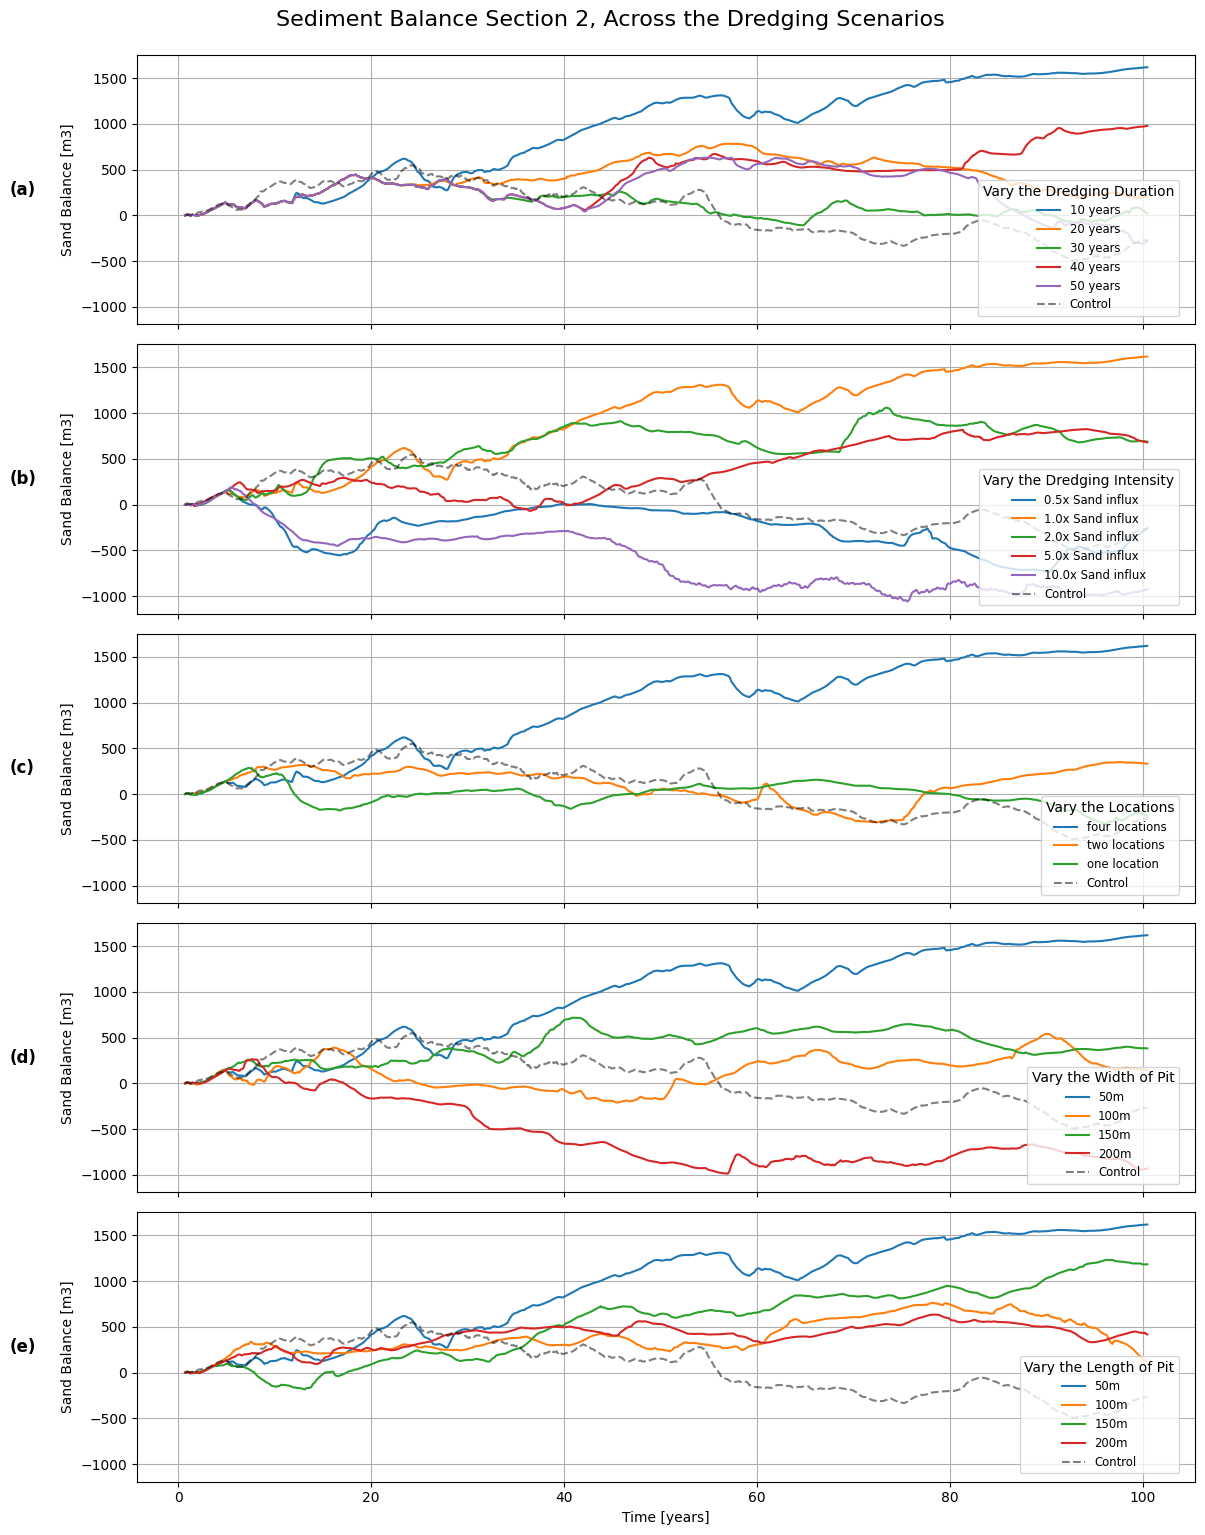

In [183]:
# Plot for each group
# Control trace
trimC = df_s2['Control']

groups = {
    'Dredging Duration': [col for col in df_SB.columns if "trih" in col and "_" not in col and not any(c in col for c in "GBL")],
    'Dredging Intensity': [col for col in df_SB.columns if "trih0" in col or "trih1_0" in col or "trih2_0" in col or "trih5_0" in col or "trih10_0" in col],
    'Locations': [col for col in df_SB.columns if "trihG" in col],
    'Width of Pit': [col for col in df_SB.columns if "trihB" in col],
    'Length of Pit': [col for col in df_SB.columns if "trihL" in col]
}


label_dict = {
    'trih10': '10 years', 'trih20': '20 years', 'trih30': '30 years', 'trih40': '40 years', 'trih50': '50 years',
    'trih0_5': '0.5x Sand influx', 'trih1_0': '1.0x Sand influx', 'trih2_0': '2.0x Sand influx', 
    'trih5_0': '5.0x Sand influx', 'trih10_0': '10.0x Sand influx',
    'trihG4': 'four locations', 'trihG2': 'two locations', 'trihG1': 'one location',
    'trihB1': '50m', 'trihB2': '100m', 'trihB3': '150m', 'trihB4': '200m',
    'trihL1': '50m', 'trihL2': '100m', 'trihL3': '150m', 'trihL4': '200m'
}


import string

fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharey=True, sharex=True)
subplot_labels = list(string.ascii_lowercase)

for i, (ax, (group_name, columns)) in enumerate(zip(axes, groups.items())):
    for col in columns:
        label = label_dict.get(col, col)
        ax.plot(df_s2.index, df_s2[col], label=label)
    ax.plot(df_SB.index, trimC, label='Control', color='black', linestyle='--', alpha=0.5)
    
    # Remove previous ylabel with labels; add text to left, centered vertically
    label_text = f"({subplot_labels[i]})"
    ax.text(-0.12, 0.5, label_text, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='left')
    
    ax.set_ylabel("Sand Balance [m3]")
    ax.grid()
    ax.legend(title=f'Vary the {group_name}', fontsize="small", loc='lower right', bbox_to_anchor=(0.99, 0.01))

axes[-1].set_xlabel("Time [years]")

plt.tight_layout()
plt.suptitle("Sediment Balance Section 2, Across the Dredging Scenarios", fontsize=16, y=1.02)
plt.savefig("C:/Users/camup/Documents/aaMEE/Master thesis/figures/SandBalance_overview_S2.png", bbox_inches='tight', dpi=400)
plt.show()
